Plant Disease Detection System

Importing Dataset 

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

Importing Libraries

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Data Preprocessing 

Training Image Preprocessing 

In [10]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


Validation Image Preprocessing 

In [11]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

Building Model

In [12]:
cnn = tf.keras.models.Sequential()

Building Convolution Layer

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [15]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [17]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
# addded dropout to avoid overfitting 25% dropout added after convolutional layer 
# dropout randomly disables neuron during training
cnn.add(tf.keras.layers.Dropout(0.25))

In [19]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
# increase no of nuerons in dense layer from 1024 to 1500 to avoid underfitting also added new conv2d with more filters 512 
# helps to extract more feature from image
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [ ]:
# dropout added to avoid overfitting added 40% dropout after dense layer
# to balance betn overfitting and underfitting
cnn.add(tf.keras.layers.Dropout(0.4)) 

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

Compiling and Training Phase

In [23]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [25]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 273s 119ms/step - loss: 1.4040 - accuracy: 0.5862 - val_loss: 0.4842 - val_accuracy: 0.8503
Epoch 2/10
2197/2197 [==============================] - 262s 119ms/step - loss: 0.4385 - accuracy: 0.8595 - val_loss: 0.2881 - val_accuracy: 0.9075
Epoch 3/10
2197/2197 [==============================] - 258s 117ms/step - loss: 0.2548 - accuracy: 0.9173 - val_loss: 0.2241 - val_accuracy: 0.9289
Epoch 4/10
2197/2197 [==============================] - 260s 118ms/step - loss: 0.1785 - accuracy: 0.9417 - val_loss: 0.1873 - val_accuracy: 0.9442
Epoch 5/10
2197/2197 [==============================] - 259s 118ms/step - loss: 0.1395 - accuracy: 0.9537 - val_loss: 0.1368 - val_accuracy: 0.9573
Epoch 6/10
2197/2197 [==============================] - 229s 104ms/step - loss: 0.0994 - accuracy: 0.9671 - val_loss: 0.1393 - val_accuracy: 0.9593
Epoch 7/10
2197/2197 [==============================] - 185s 84ms/step - loss: 0.0891 - accuracy: 0.9703 - val_l

Evaluating Model

In [26]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 60s 27ms/step - loss: 0.0328 - accuracy: 0.9891
Training accuracy: 0.989131510257721


In [27]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 15s 27ms/step - loss: 0.1251 - accuracy: 0.9645
Validation accuracy: 0.9645458459854126


Saving Model

In [59]:
cnn.save('trained_plant_disease_model.h5')

In [28]:
cnn.save('trained_plant_disease_model.keras')

In [29]:
training_history.history #Return Dictionary of history

{'loss': [1.4040474891662598,
  0.4384567439556122,
  0.25477859377861023,
  0.1785489320755005,
  0.13953733444213867,
  0.09940360486507416,
  0.08909089118242264,
  0.07044126838445663,
  0.0605139285326004,
  0.05519462376832962],
 'accuracy': [0.5862152576446533,
  0.8594779372215271,
  0.9173056483268738,
  0.9416743516921997,
  0.9536666870117188,
  0.9671242833137512,
  0.9702966213226318,
  0.976925790309906,
  0.9796856045722961,
  0.9828579425811768],
 'val_loss': [0.48418188095092773,
  0.2881305515766144,
  0.22411128878593445,
  0.18727508187294006,
  0.13684658706188202,
  0.13931044936180115,
  0.14803673326969147,
  0.14185814559459686,
  0.1232803463935852,
  0.12511730194091797],
 'val_accuracy': [0.8503300547599792,
  0.9074664115905762,
  0.9288641214370728,
  0.9441725611686707,
  0.9572615623474121,
  0.9593102931976318,
  0.9561233520507812,
  0.9558388590812683,
  0.9660823941230774,
  0.9645458459854126]}

In [30]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [31]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Accuracy Visualization 

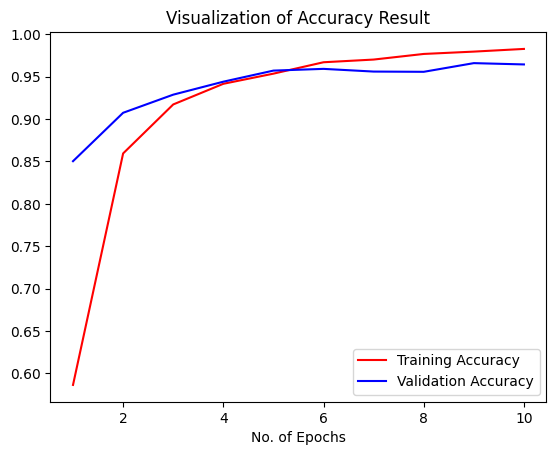

In [32]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

Some other metrics for model evaluation

In [33]:
class_name = validation_set.class_names

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [35]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 72s 4ms/step


In [36]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [37]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [38]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [40]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.97      0.97       504
                                 Apple___Black_rot       0.98      1.00      0.99       497
                          Apple___Cedar_apple_rust       0.97      0.97      0.97       440
                                   Apple___healthy       0.96      0.95      0.96       502
                               Blueberry___healthy       0.93      1.00      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.84      0.90       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.99      0.

Confusion Matrix Visualization

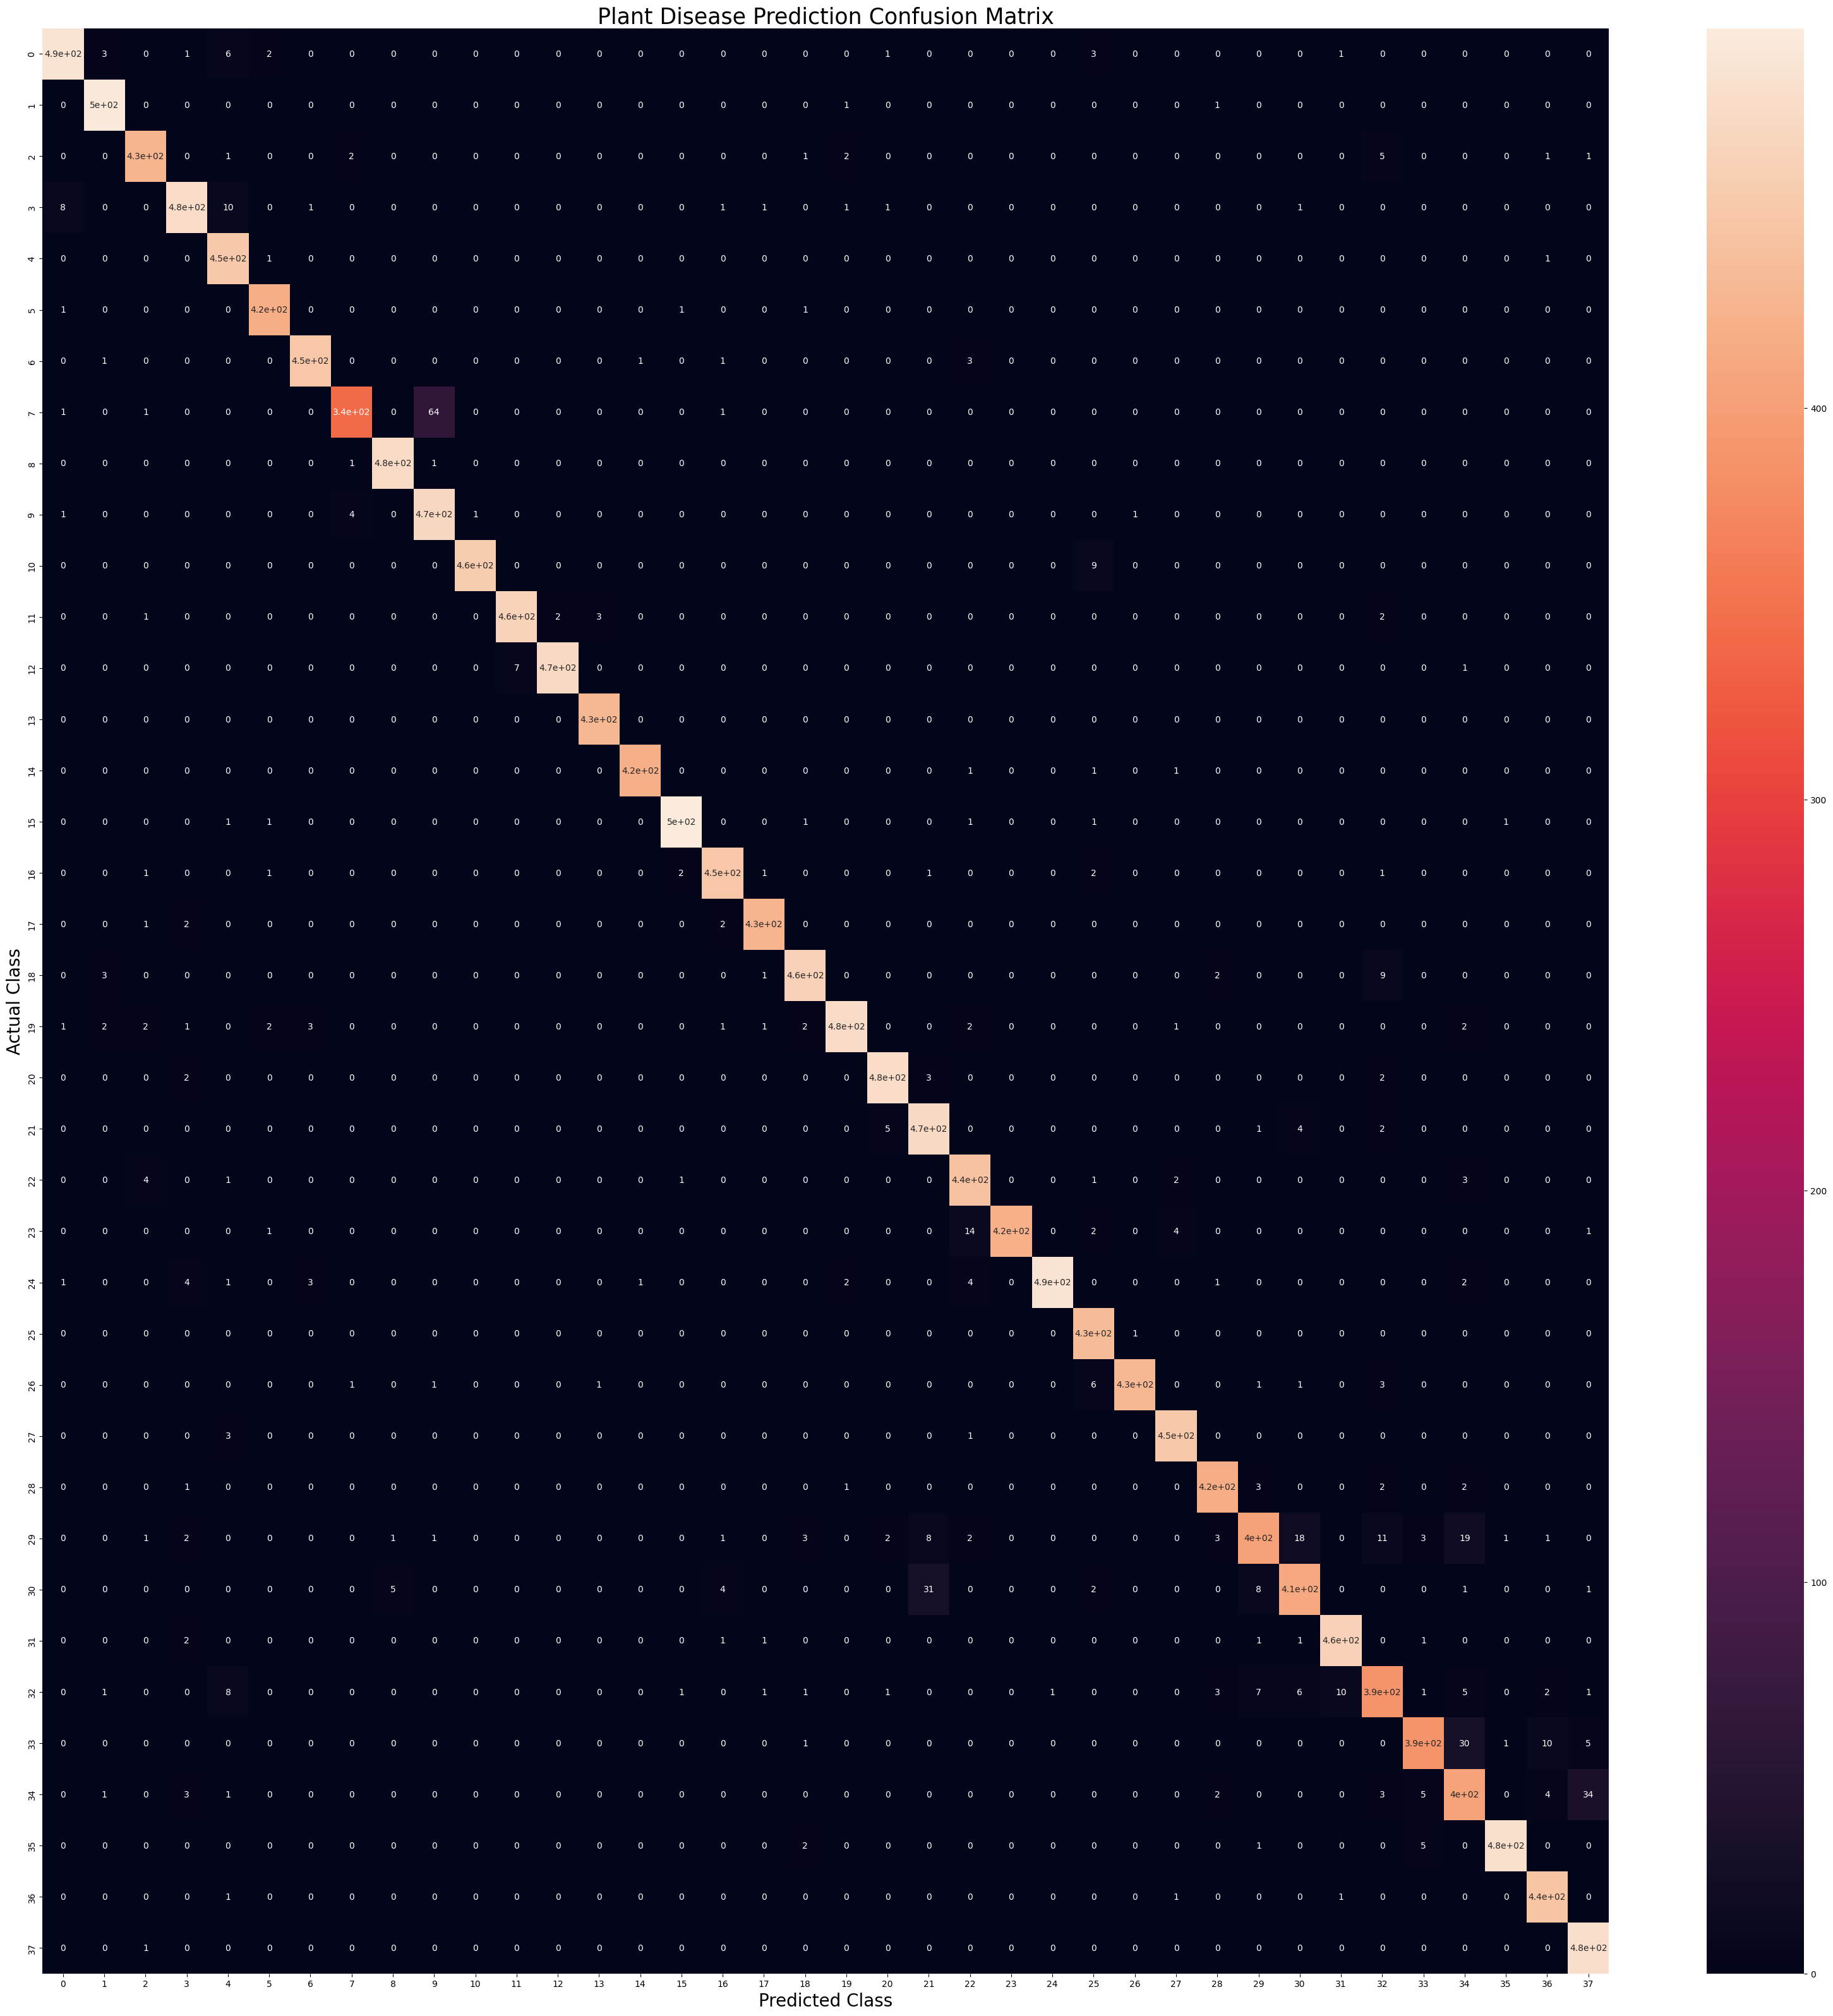

In [41]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()